# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Harisman Arif
- **Email:** harisman.arif7@gmail.com
- **ID Dicoding:** harisman_arif7

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penyewaan sepeda pada jam-jam tertentu sepanjang hari?
- Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/harisman7/proyek-analisis-data/refs/heads/main/data/hour.csv")
day_df = pd.read_csv("https://raw.githubusercontent.com/harisman7/proyek-analisis-data/refs/heads/main/data/day.csv")

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Informasi Data
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### Assessing Data

#### Menilai data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Missing values pada tiap kolom pada dataframe hour_df: ", hour_df.isna().sum())
print("Jumlah duplikasi dataframe hour: ", hour_df.duplicated().sum())

Missing values pada tiap kolom pada dataframe hour_df:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi dataframe hour:  0


#### Menilai data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Missing values pada tiap kolom pada dataframe day_df: ", day_df.isna().sum())
print("Jumlah duplikasi dataframe day: ", day_df.duplicated().sum())

Missing values pada tiap kolom pada dataframe day_df:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi dataframe day:  0


**Insight:**
- Terdapat kesalahan tipe data pada file hour_df dan day_df yaitu pada kolom dteday masih dalam bentuk object

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Mengubah Data Type
Mengubah tipe data dteday dari object ke datetime

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengubah Nama Kolom

Mengubah beberapa nama kolom sehingga mudah digunakan

In [ ]:
kolom_day_rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
day_df.rename(columns=kolom_day_rename, inplace=True)

kolom_hour_rename = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
hour_df.rename(columns=kolom_hour_rename, inplace=True)

#### Mengubah Tipe Data menjadi Kategori
Mengubah beberapa tipe data sehingga mudah digunakan

In [ ]:
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['hour'] = hour_df['hour'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

In [ ]:
day_df['season'] = day_df['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
day_df['year'] = day_df['year'].map({0: 2011, 1: 2012})
day_df['month'] = day_df['month'].apply(lambda x: calendar.month_name[x])
day_df['holiday'] = day_df['holiday'].map({0: 'no', 1: 'yes'})
day_df['weekday'] = day_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
day_df['workingday'] = day_df['workingday'].map({0: 'no', 1: 'yes'})

hour_df['season'] = hour_df['season'].map({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['year'] = hour_df['year'].map({0: 2011, 1: 2012})
hour_df['month'] = hour_df['month'].apply(lambda x: calendar.month_name[x])
hour_df['holiday'] = hour_df['holiday'].map({0: 'no', 1: 'yes'})
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'no', 1: 'yes'})

## Exploratory Data Analysis (EDA)

### Explore pengguna rental sepeda berdasarkan beberapa kriteria

In [ ]:
Berdasarkan jam

In [ ]:
hour_df.groupby(by="hour").agg({
    "casual": "mean",
    "registered": "mean",
    "total": "mean"
}).sort_values(by="total", ascending=False)

<ipython-input-70-26e87bd81a6d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="hour").agg({


,casual,registered,total
hour,,,
17,74.273973,387.178082,461.452055
18,61.120879,364.390110,425.510989
8,21.679505,337.331499,359.011004
16,73.745205,238.238356,311.983562
19,48.770604,262.752747,311.523352
13,72.308642,181.352538,253.661180
12,68.293956,185.021978,253.315934
15,74.905350,176.327846,251.233196
14,75.567901,165.381344,240.949246


Berdasarkan musim

In [ ]:
hour_df.groupby(by="season").agg({
    "casual": "mean",
    "registered": "mean",
    "total": "mean"
}).sort_values(by="total", ascending=False,)

<ipython-input-71-4264439def61>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="season").agg({


,casual,registered,total
season,,,
fall,50.287144,185.729093,236.016237
summer,46.160581,162.183488,208.344069
winter,30.666824,168.202032,198.868856
springer,14.290901,96.823668,111.114569


Berdasarkan temperature

In [ ]:
hour_df.groupby(by="temperature").agg({
    "casual": "mean",
    "registered": "mean",
    "total": "mean"
}).sort_values(by="total", ascending=False,)

,casual,registered,total
temperature,,,
0.98,82.000000,457.000000,539.000000
0.88,97.962264,265.698113,363.660377
0.80,85.292308,262.083077,347.375385
0.76,82.512626,260.063131,342.575758
0.82,88.276995,251.413146,339.690141
0.84,83.456522,242.362319,325.818841
0.86,80.580153,242.374046,322.954198
0.92,76.448980,243.571429,320.020408
0.78,76.130178,237.065089,313.195266


Berdasarkan musim dan temperature

In [ ]:
hour_df.groupby(by=["season", "temperature"]).agg({
    "total": "mean"
}).reset_index().sort_values(by="temperature", ascending=False)

<ipython-input-81-a583d442674e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["season", "temperature"]).agg({


,season,temperature,total
199,winter,1.00,NaN
149,fall,1.00,294.000000
99,summer,1.00,NaN
49,springer,1.00,NaN
48,springer,0.98,NaN
...,...,...,...
151,winter,0.04,NaN
0,springer,0.02,41.882353
150,winter,0.02,NaN
50,summer,0.02,NaN


In [ ]:
hour_df.groupby(by=["season", "temperature"]).agg({
    "total": "mean"
}).reset_index().sort_values(by="total", ascending=False)

<ipython-input-85-bd3aea52e86b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["season", "temperature"]).agg({


,season,temperature,total
148,fall,0.98,539.000000
34,springer,0.70,528.555556
186,winter,0.74,467.818182
31,springer,0.64,434.600000
184,winter,0.70,430.181818
...,...,...,...
195,winter,0.92,NaN
196,winter,0.94,NaN
197,winter,0.96,NaN
198,winter,0.98,NaN


Korelasi antar atribut dan heatmap correlation

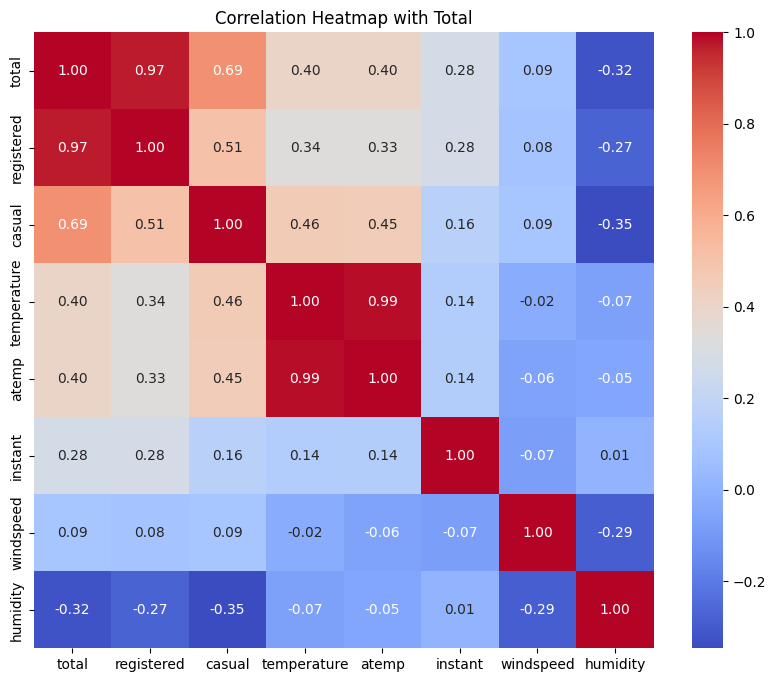

In [ ]:
# Memilih hanya kolom numerik
numeric_df = hour_df.select_dtypes(include=[np.number])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()
correlation_with_total = correlation_matrix['total']
correlation_with_total_sorted = correlation_with_total.sort_values(ascending=False)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[correlation_with_total_sorted.index, correlation_with_total_sorted.index], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Total')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda pada jam-jam tertentu sepanjang hari?

<ipython-input-74-f8daa99bc6a1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_grouped = hour_df.groupby(by="hour").agg({


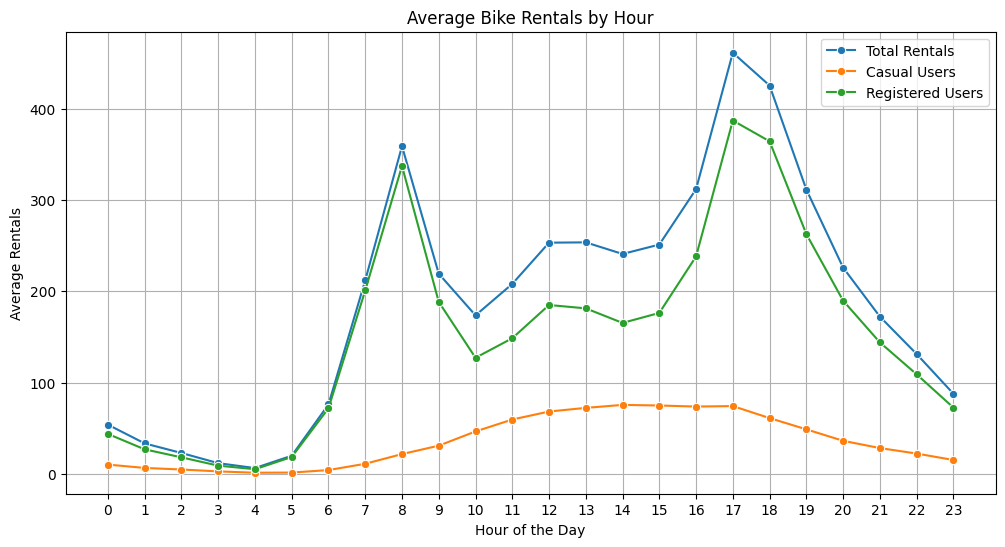

In [ ]:
# Group by hour and calculate mean of 'total', 'casual', and 'registered'
hourly_grouped = hour_df.groupby(by="hour").agg({
    "casual": "mean",
    "registered": "mean",
    "total": "mean"
}).sort_values(by="total", ascending=False)

# Visualize total rentals by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_grouped, x='hour', y='total', label='Total Rentals', marker='o')
sns.lineplot(data=hourly_grouped, x='hour', y='casual', label='Casual Users', marker='o')
sns.lineplot(data=hourly_grouped, x='hour', y='registered', label='Registered Users', marker='o')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

Didapati rata rata pada jam 17 sore pengguna rental sepeda paling banyak, diikuti dengan jam 8 pagi, lalu pada jam 4 pagi yang paling sedikit

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

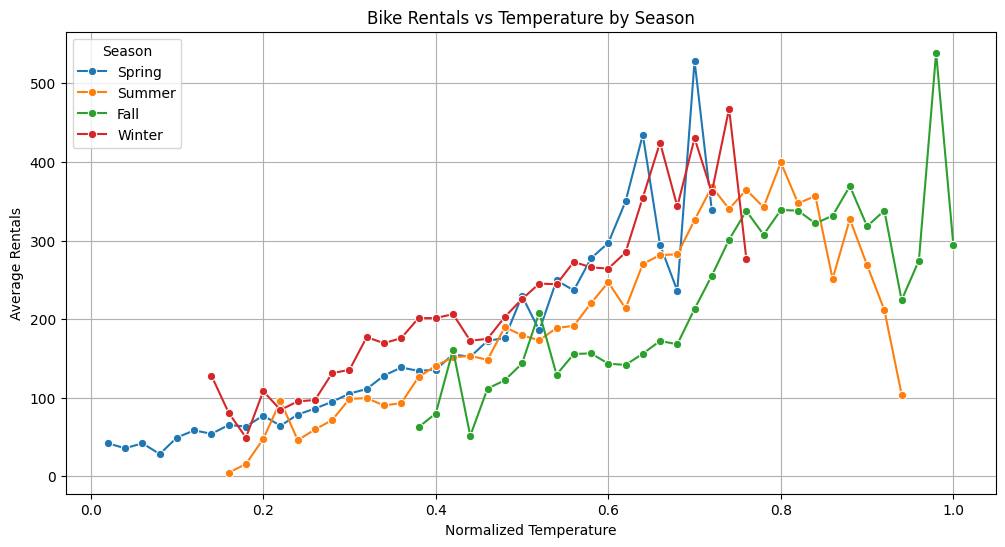

In [ ]:
# Group by season and temperature, then aggregate total rentals
temp_season_grouped = hour_df.groupby(by=["season", "temperature"], observed=True).agg({
    "total": "mean"
}).reset_index().sort_values(by="total", ascending=False)

# Visualize the relationship between temperature and total rentals for each season
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_season_grouped, x='temperature', y='total', hue='season', marker='o', palette="tab10")
plt.title('Bike Rentals vs Temperature by Season')
plt.xlabel('Normalized Temperature')
plt.ylabel('Average Rentals')
handles, labels = plt.gca().get_legend_handles_labels()
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
new_labels = [season_labels[label] for label in range(len(labels))]
plt.legend(handles, new_labels, title='Season')
plt.grid()
plt.show()

Terdapat korelasi positif antara suhu dan jumlah penyewaan: semakin tinggi suhu, semakin banyak sepeda yang disewa. Fenomena ini paling menonjol pada musim semi dan musim panas, di mana suhu yang hangat mendorong masyarakat untuk beraktivitas di luar ruangan, termasuk bersepeda. Musim gugur juga menunjukkan tren serupa, meskipun tidak sekuat musim sebelumnya. Sebaliknya, musim dingin mencatat jumlah penyewaan sepeda yang paling rendah, yang mengindikasikan bahwa cuaca dingin menjadi penghalang bagi aktivitas bersepeda.

## Conclusion

- Terdapat dua puncak penyewaan dalam sehari, yaitu sekitar pukul 8 pagi dan 5 sore. Puncak pagi kemungkinan besar disebabkan oleh aktivitas komuter yang menggunakan sepeda untuk pergi bekerja atau sekolah. Sementara itu, puncak sore mengindikasikan penggunaan sepeda untuk rekreasi atau aktivitas lainnya setelah selesai bekerja atau beraktivitas.
- Semakin tinggi suhu, terutama di atas rata-rata, semakin banyak sepeda disewa. Pola ini paling jelas terlihat pada musim panas, di mana cuaca hangat dan cerah mendorong masyarakat untuk bersepeda. Musim gugur dan musim semi juga menunjukkan tren serupa, meskipun tidak sekuat musim panas. Sebaliknya, musim dingin mencatat jumlah penyewaan terendah, menunjukkan bahwa faktor cuaca dingin seperti salju dan hujan lebih dominan dalam mempengaruhi perilaku penyewaan sepeda.